# Hybrid Agent in the NumberLine Environment

A numberline is a simple environment, and the hybrid agent is the naive agent with a few more intelligent upgrades - models aimed at making it's path finding more guided.

First we import the agent and the environment...

In [1]:
from sensorimotor.agents import HybridAgent
from sensorimotor.envs import FiniteNumberLine

import time, random

Initialize the Environment and the Agent...

In [2]:
env = FiniteNumberLine()
agent = HybridAgent(env)

Training: allow the agent to explore (at random in this case)...

In [ ]:
agent.pretrain(verbose=True)

In [ ]:
agent.train(verbose=True)

In [ ]:
agent.train(verbose=True)

In [ ]:
agent.state

In [ ]:
len(agent.graph.pairs)

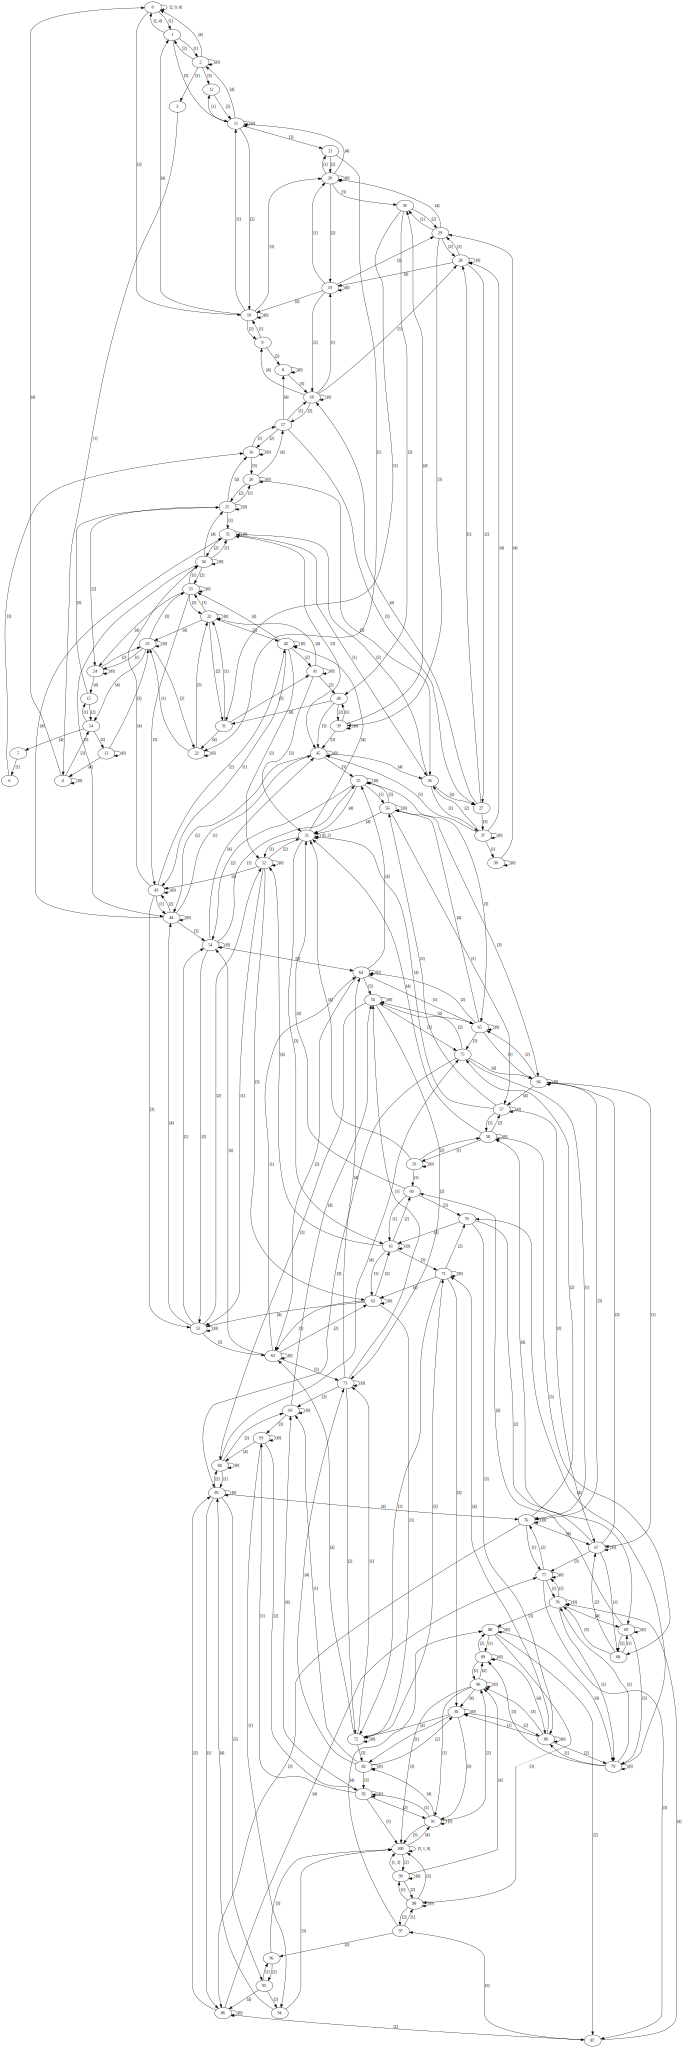

In [4]:
agent.graph.visualize()

In [ ]:
starting_state = 98
goal_state = 96
agent.get_path(target=goal_state, start=starting_state)

In [ ]:
starting_state = 10
goal_state = 15
agent.get_path(target=goal_state, start=starting_state, simply=True)

Since this is a finite environment and we know it we can tell the agent to train until it isn't getting any suprise anymore

In [3]:
agent.fully_train(verbose=True)

.not using NN
model is xgb
dataset is {1: [[0, 2, 3, 29, 20, 21, 32, 33, 34, 55, 56, 51, 62, 53, 54, 42, 60, 52, 71, 72, 57, 88, 64, 75, 76, 77, 68, 65, 31, 1, 11, 10, 30, 14, 22, 23, 5, 16, 17, 25, 27, 19, 9, 18, 28, 73, 84, 85, 36, 39, 44, 58, 74, 100, 90, 80, 91, 86, 78, 79, 99, 81, 95, 89, 92, 97, 82, 66, 67, 59, 61, 63, 98, 93, 43, 35, 37], [1, 3, 4, 30, 21, 22, 33, 34, 35, 56, 57, 52, 63, 54, 55, 43, 61, 53, 72, 73, 58, 89, 65, 76, 77, 78, 69, 66, 32, 2, 12, 11, 31, 15, 23, 24, 6, 17, 18, 26, 28, 20, 10, 19, 29, 74, 85, 86, 37, 40, 45, 59, 75, 100, 91, 81, 92, 87, 79, 80, 100, 82, 96, 90, 93, 98, 83, 67, 68, 60, 62, 64, 99, 94, 44, 36, 38]], 3: [[1, 0, 10, 11, 19, 22, 35, 45, 56, 57, 52, 41, 51, 39, 54, 55, 63, 65, 58, 68, 78, 88, 61, 73, 69, 44, 2, 31, 42, 4, 13, 23, 15, 25, 33, 32, 6, 16, 17, 8, 18, 20, 29, 30, 40, 43, 53, 72, 74, 26, 37, 34, 64, 83, 85, 94, 100, 90, 91, 81, 92, 75, 76, 87, 79, 80, 99, 98, 70, 71, 96, 66, 67, 77, 82, 60, 62, 27], [11, 10, 20, 21, 29, 32, 45, 55

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75], got [  1   2   3   4   6  10  11  12  15  17  18  19  20  21  22  23  24  26  28  29  30  31  32  33  34  35  36  37  38  40  43  44  45  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  72  73  74  75  76  77  78  79  80  81  82  83  85  86  87  89  90  91  92  93  94  96  98  99 100]

In [ ]:
agent.predictor.predict_future(4, 69)

now lets try making it bigger, instead of 0-100 we'll do 0-1000

In [ ]:
env = FiniteNumberLine(min=0, max=1000, gapMin=0, gapMax=0)
agent = NaiveAgent(env)

training will take longer

In [ ]:
import time
then = time.time()
agent.fully_train(verbose=True)
print('seconds:', time.time() - then)

In [ ]:
len(agent.graph.pairs)

In [ ]:
import random
starting_state = random.choice(list(agent.graph.pairs.keys()))[0]
goal_state = random.choice(list(agent.graph.pairs.keys()))[1]
print(1, '->', goal_state)

looking for a path will take some more time too, and there's no guarantee we'll find one.

In [ ]:
%%timeit
agent.get_path(target=goal_state, start=starting_state, simply=True)

In [ ]:
agent.graph.path(child=goal_state, parent=starting_state)

In [ ]:
%%timeit
agent.get_path(target=goal_state, start=1, simply=True)

Let's inspect how it got there by looking at the full detail of this node (the naive agent makes an explicit memory everytime it sees a new state)...

In [ ]:
agent.graph

Notice the last action it took (to get to its current state) is listed as 'edge' above.
```
    0 = do nothing
    1 = +1
    2 = -1
    3 = +10
    4 = -9
```
And let's ask the agent to figure out how to get from somehting it has seen before to the last state of the environment that it saw...

In [ ]:
print('going from', three_b4_final, 'to', final_state, 'using the environment actions...')
print(agent.get_path(target=final_state, start=three_b4_final))
print('...which correspond to...')
print([
    {0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(action, '+0')
    for action in agent.get_path(target=final_state, start=three_b4_final)])

Pretty cool, the agent knows how to manipulate the environment from one state to produce another state (that is, it knows how to traverse the state space of the environment, at least in this case)...

Now let's actually ask it to do so. We'll reset the state to something it has seen before...

In [ ]:
agent.reset(three_b4_final)

Then we'll ask it to execute the steps to get to the last state of the environment saw...

In [ ]:
agent.do(final_state, verbose=True)

Let's try a longer environment manipulation: from the first thing the agent ever saw to the last thing the agent ever saw...

In [ ]:
print(agent.get_path(target=final_state, start=14))

The above action-path may be less than 1000 steps, this is because the agent looks for the shortest path it has ever seen between the two state representations.

In [ ]:
x = -21
for i in agent.get_path(target=final_state, start=14):
    print(eval(str(x)+{0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(i, '+0')))

In [ ]:
eval(''.join(['-21'] + [{0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(x, '+0') for x in agent.get_path(target=final_state, start=14)]))

We'll close the environment...

In [ ]:
env.close()

## Review

The naive agent makes explicit memory, it doesn't generalize in any way. It doesn't understand patterns. It can't detect that this one kind of action is exactly the opposite from another kind of action. It can't extrapolate or draw conclusions. It is not intelligent.

If the environment is small the agent is able to memorize the environment and produce any configuration of it that you would like. This is the essential role of any sensorimotor inference engine: that it can manipulate the environment it is connected to merely by you showing it the state of the environment you would like to see.

In order to achieve scale such that a Sensorimotor agent can manipulate any size and complexity of a deterministic environment we need to infuse it with more intelligence.

In [ ]:
import anytree
print(anytree.RenderTree(
    agent.root,
    #style=anytree.render.AsciiStyle()
    )
 )